# 线性代数：机器学习背后的优化原理

        
线性代数作为数学的一个分支，广泛应用于科学和工程中，掌握好线性代数对于理解和从事机器学习算法相关工作是很有必要的，尤其对于深度学习算法而言。因此，这个项目会从浅入深更好的帮助你学习与积累一些跟人工智能强相关的线性代数的知识。

本项目内容理论知识部分参考[《DeepLearning》又名花书](https://book.douban.com/subject/27087503/)第二章，希望大家支持正版购买图书。

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

## 准备工作

我们将讲解常用的线性代数知识，而学员需使用numpy来实现这些知识点（当然也可以自己写算法实现），还需要使用matplotlib完成规定图像习题，当然，本项目用到的python代码(或numpy的使用)课程中并未完全教授，所以需要学员对相应操作进行学习与查询，这在我们往后的人工智能学习之旅中是必不可少的一个技能，请大家珍惜此项目的练习机会。

当然，这里提供官方的[numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html#)来帮助你更好的完成项目。

本项目还需要使用LaTeX公式，以下两个链接供学习与使用：

[Latex cheatsheet](https://www.authorea.com/users/77723/articles/110898-how-to-write-mathematical-equations-expressions-and-symbols-with-latex-a-cheatsheet)

[aTeX Cookbook](http://www.personal.ceu.hu/tex/cookbook.html#inline)

首先，导入你所需的软件包。一般我们建议在工程开头导入**所有**需要的软件包。

In [1]:
# TODO: import相关库
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

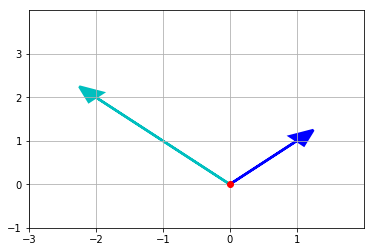

In [2]:
# Define vector v 
v = np.array([1,1])

# Define vector w
w = np.array([-2,2])

# Plots vector v(blue arrow) and vector w(cyan arrow) with red dot at origin (0,0) 
# using Matplotlib

# Creates axes of plot referenced 'ax'
ax = plt.axes()

# Plots red dot at origin (0,0)
ax.plot(0,0,'or')

# Plots vector v as blue arrow starting at origin 0,0
ax.arrow(0, 0, *v, color='b', linewidth=2.5, head_width=0.30, head_length=0.35)

# Plots vector w as cyan arrow starting at origin 0,0
ax.arrow(0, 0, *w, color='c', linewidth=2.5, head_width=0.30, head_length=0.35)

# Sets limit for plot for x-axis
plt.xlim(-3, 2)

# Set major ticks for x-axis
major_xticks = np.arange(-3, 2)
ax.set_xticks(major_xticks)


# Sets limit for plot for y-axis
plt.ylim(-1, 4)

# Set major ticks for y-axis
major_yticks = np.arange(-1, 4)
ax.set_yticks(major_yticks)

# Creates gridlines for only major tick marks
plt.grid(b=True, which='major')

# Displays final plot
plt.show()

## 1、标量，向量，矩阵，张量

**首先，让我们回顾下基本的定义：**

- 标量（scalar）：形式而言，一个标量是一个单独的数，常用斜体的小写变量名称来表示。_v_

- 向量（vector）：形式而言，一个向量是一列有序数，常用粗体的小写变量名称表示**v**，或者上面标记剪头$\vec{v}$ 

- 矩阵（matrix）：形式而言，一个矩阵是一个二维数组，常用大写变量名称表示A，表示内部的元素则会使用$A_{i,j}$

- 张量（tensor）：形式而言，一个张量是一个多维数组，常用粗体的大写字母变量名称表示**T**，表示内部的元素则会使用$A_{i,j,z}$ 等等

用图片直观的显示区别如下
<img src="images/diff.png" width="500">

**接下来让我们回顾下基本的运算：**

- 加法
<img src="images/add.png" width="500">

- 标量乘法
<img src="images/scmu.png" width="400">

- 转置
<img src="images/trans.png" width="370">

- 矩阵向量乘法（内积，人工智能中常见的拼写：matrix product 或者 dot product） 
<img src="images/mul.png" width="570">

**线性方程组：**

由矩阵乘法也演变出了我们最常见的线性方程组，已知矩阵与未知向量的乘积，等于另一个已知向量，通过此方程组可求解那个未知向量，一般写为x，具体如下表示。
等式左侧可以这么来理解：
<img src="images/axb.png" width="400">
列为具体的矩阵来看：
$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
=
\begin{bmatrix}
    b_1 \\\\
    b_2 \\\\
    \cdots \\\\
    b_m
\end{bmatrix}
$$

或者更简单的表示为

$$Ax=b$$

既然有未知数，那么自然需要求解未知数，而我们的未知数需要满足所有方程，也不是一直都有解的，下面来列我们二维矩阵所组成的方程解的情况,若两条线平行不存在焦点，那么说明没有一个$x_1$, $x_2$同时满足两个方程，则此方程组无解，同理，若相交，则有一个解，若完全相等，则有无穷个解。
<img src="images/axbsolu.png" width="570">

### 1.1、基本运算并绘图
例题 $\vec{v}$ + $\vec{w}$

$\hspace{1cm}\vec{v} = \begin{bmatrix} 1\\ 1\end{bmatrix}$


$\hspace{1cm}\vec{w} = \begin{bmatrix} -2\\ 2\end{bmatrix}$

结果需要先使用numpy计算向量运算结果，并用LaTeX公式表示：

$\hspace{1cm}\vec{v}+\vec{w} = \begin{bmatrix} -1\\ 3\end{bmatrix}$

并使用matlibplot绘制出(图表颜色样式不要求)

<img src="images/add_e.png" width="300">

#### 1.1.1
**根据上面例题展示，计算并绘制  $2\vec{v}$ - $\vec{w}$  的结果**

$\hspace{1cm}\vec{v} = \begin{bmatrix} 4\\ 1\end{bmatrix}$


$\hspace{1cm}\vec{w} = \begin{bmatrix} -1\\ 2\end{bmatrix}$



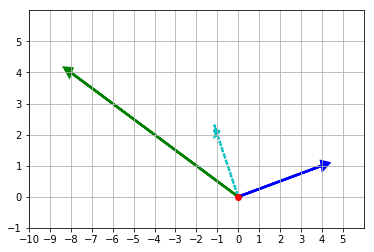

In [3]:
# 1.1.1 TODO：
#定义向量v:
v = np.array([4,1])

#定义向量w:
w = np.array([-1,2])

#定义标量a:
a = 2

#定义向量内积结果:
avw = a*v*w.T

# Plots vector v(blue arrow) and vector w(cyan arrow) with red dot at origin (0,0) 
# using Matplotlib

# 创建一个变量ax来表示图的坐标轴
ax = plt.axes()

# 使用ax和plot方法绘出原点0，0（红点）
ax.plot(0,0,'or')

# 使用ax和arrow方法绘出向量v：蓝色箭头，起点为0，0
ax.arrow(0, 0, *v, color='b', linewidth=2.5, head_width=0.30, head_length=0.35)

# 使用ax和arrow方法绘出向量w：蓝绿色虚线箭头，起点为0，0
ax.arrow(0, 0, *w, linestyle='dotted', color='c', linewidth=2.5, 
         head_width=0.30, head_length=0.35)

#使用ax和arrow方法绘出向量av·w：黑色箭头，起点为0，0
ax.arrow(0, 0, *avw, color='g', linewidth=2.5, head_width=0.30, head_length=0.35)


# 使用xlim方法设置范围
plt.xlim(-10, 6)

# 使用ax和set_xticks方法设置主要刻度线
major_xticks = np.arange(-10, 6)
ax.set_xticks(major_xticks)


# 使用ylim方法设置范围
plt.ylim(-1, 6)

# 使用ax和set_yticks方法设置主要刻度线
major_yticks = np.arange(-1, 6)
ax.set_yticks(major_yticks)

# 使用grid方法创建网格线
plt.grid(b=True, which='major')

# 使用show方法显示图
plt.show()

例题，方程组求解：
$$
\begin{cases}
y = 2x + 1\\\\
y = 6x - 2
\end{cases}
$$
用matplotlib绘制图表（图表样式不要求）
<img src="images/2equ_solu.png" width="300">
由上可知此方程组有且仅有一个解

需使用numpy（或自写算法）计算该解的结果,并用LaTeX公式表示出来(结果可以用小数或者分数展示)
$$
\begin{cases}
x = \frac{3}{4} \\\\
y = \frac{5}{2}
\end{cases}
$$


#### 1.1.2 
**根据上面例题展示，绘制方程组，说明是否有解是否为唯一解，若有解需计算出方程组的解**
$$
\begin{cases}
y = 2x + 1\\\\
y = \frac{1}{10}x+6
\end{cases}
$$

In [4]:
def check_vector_span(set_of_vectors, vector_to_check):
    # Creates an empty vector of correct size
    vector_of_scalars = np.asarray([None]*set_of_vectors.shape[0])
    
    # Solves for the scalars that make the equation true if vector is within the span
    try:
        # TODO: Use np.linalg.solve() function here to solve for vector_of_scalars
        vector_of_scalars = np.linalg.solve(set_of_vectors, vector_to_check)
        if not (vector_of_scalars is None):
            print("\nVector is within span.\nScalars in s:", vector_of_scalars)
    # Handles the cases when the vector is NOT within the span   
    except Exception as exception_type:
        if str(exception_type) == "Singular matrix":
            print("\nNo single solution\nVector is NOT within span")
        else:
            print("\nUnexpected Exception Error:", exception_type)
    return vector_of_scalars

In [5]:
vw2 = np.array([[2, -1], [0.1, -1]]) 
t2 = np.array([-1, -6])
print("\nNew Vectors:\n Matrix vw2:", vw2, "\nVector t2:", t2, sep="\n")    
# Call to check_vector_span
s2 = check_vector_span(vw2,t2)


New Vectors:
 Matrix vw2:
[[ 2.  -1. ]
 [ 0.1 -1. ]]

Vector t2:
[-1 -6]

Vector is within span.
Scalars in s: [2.63157895 6.26315789]


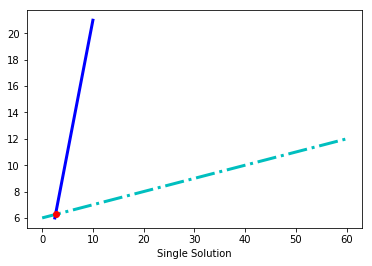

In [6]:
# 1.1.2 TODO
plt.plot([2.5,10],[6,21],'b',linewidth=3)
plt.plot([0,60],[6,12],'c-.',linewidth=3)
plt.plot([2.63157895],[6.26315789],'ro',linewidth=3)
plt.xlabel('Single Solution')
plt.show()

### 1.2、说明题
#### 1.2.1
**使用numpy（或自写算法）说明$(AB)^{\text{T}} = B^\text{T}A^\text{T}$**

**其中**
$$
A=\begin{bmatrix}
    21 & 7 \\\\
    15 & 42 \\\\
    9 & 6
\end{bmatrix}, 
B=\begin{bmatrix}
    4 \\\\
    33
\end{bmatrix}
$$

In [7]:
# 1.2.1 TODO
A = np.array([[21,7],[15,42],[9,6]])
B = np.array([[4],[33]])
AB_T = np.dot(A,B).T
BTAT = np.dot((B.T),(A.T))
if (AB_T == BTAT).all:
    print("(AB)T = BTAT")
else:
    print("(AB)T != BTAT")

(AB)T = BTAT


#### 1.2.2
**使用numpy（或自写算法）说明  $A ( B + C ) = AB + AC$ **

**其中**
$$
A=\begin{bmatrix}
    9 & 3 \\\\
    8 & 4 \\\\
    7 & 6
\end{bmatrix}, 
B=\begin{bmatrix}
    5 \\\\
    2
\end{bmatrix}, 
C=\begin{bmatrix}
    5 \\\\
    7
\end{bmatrix}
$$

In [8]:
# 1.2.2 TODO
A = np.array([[9,3],[8,4],[7,6]])
B = np.array([[5],[2]])
C = np.array([[5],[7]])
A_BC = np.dot(A, (B+C))
AB_AC = np.dot(A, B) + np.dot(A, C)
if (A_BC == AB_AC).all:
    print("𝐴(𝐵+𝐶)=𝐴𝐵+𝐴𝐶")
else:
    print("𝐴(𝐵+𝐶)!=𝐴𝐵+𝐴𝐶")

𝐴(𝐵+𝐶)=𝐴𝐵+𝐴𝐶


## 2、特殊矩阵

- 单位矩阵

如果选取任意一个向量和某矩阵相乘，该向量都不会改变，我们将这种保持n维向量不变的矩阵记为单位矩阵$I_n$

- 逆矩阵

如果存在一个矩阵，使$A^{-1} A = I_n$，那么$A^{-1}$就是A的逆矩阵。

- 对角矩阵

如果一个矩阵只有主对角线上还有非零元素，其他位置都是零，这个矩阵就是对角矩阵

- 对称矩阵

如果一个矩阵的转置是和它自己相等的矩阵，即$A=A^{T}$，那么这个矩阵就是对称矩阵

- 正交矩阵

行向量和列向量是分别标准正交(90度)的方阵，即$A^{T}A = AA^{T} = I_n$，又即$A^{-1} = A^{T}$，那么这种方阵就是正交矩阵




### 2.1、证明题

通过LaTeX公式，结合上面所述概念，假设$A^{-1}$存在的情况下，证明$Ax=b$的解$x={A}^{-1}{b}$

回答：
假设我们知道矩阵 A 和 B，而需要求矩阵 X:

XA = B

如果可以每边除以 A （来得到 X=B/A）就最好了，但 我们不能除矩阵。

 

可是，把每边乘以 A^(-1) 呢？

XAA^(-1) = BA^(-1)

我们知道 AA^(-1) = I，所以：

XI = BA^(-1)

拿走 I （和把 "1" 从数子式子 1x = ab 拿走一样）：

X = BA^(-1)

### 2.2、 计算题

#### 2.2.1

通过numpy计算，再次验证2.1证明题
$$
\begin{cases}
y = 2x + 1\\\\
y = \frac{1}{10}x+6
\end{cases}
$$
并用LaTeX公式写出$A^{-1}$是多少（小数分数皆可）

In [18]:
# 2.2.1 TODO
A = np.array([[2,-1],[0.1,-1]])

print('数组A：')
print(A)

#ainv = np.linalg.inv(A)
#print("A的逆：")
#print(ainv)

b = np.array([[-1],[-6]])
print("矩阵b：")
print(b)

x = np.linalg.solve(A,b)
print("计算：A^(-1)b:")
print(x)

ainv = A**(-1)
print("A的逆：")
print(ainv)

数组A：
[[ 2.  -1. ]
 [ 0.1 -1. ]]
矩阵b：
[[-1]
 [-6]]
计算：A^(-1)b:
[[2.63157895]
 [6.26315789]]
A的逆：
[[ 0.5 -1. ]
 [10.  -1. ]]


#### 2.2.2

1、请用numpy（或自写算法）实现一个6x6的对角矩阵，矩阵的对角线由3至8（含8）组成。

2、计算第一问生成的对角矩阵与向量$[6,7,1,2,5,9]^{T}$的乘积

In [26]:
# 2.2.2 TODO
v = [3,4,5,6,7,8]
X = np.diag(v)
print(X)

p = np.array([[6,7,1,2,5,9]])
pt = p.T
s = np.dot((X),(pt))
print(s)

[[3 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 6 0 0]
 [0 0 0 0 7 0]
 [0 0 0 0 0 8]]
[[18]
 [28]
 [ 5]
 [12]
 [35]
 [72]]


## 3、迹运算
迹运算返回的是矩阵对角元素的和，如图所示
<img src="images/matrix.png" width="360">
写成数学公式为：
$$ \large Tr(A) = \sum_{i}A_{i,i}$$

**说明题：**

使用numpy验证
$$
\large Tr(ABC) = Tr(CAB) = Tr(BCA)
$$
其中
$$
A=
\begin{bmatrix}
    7 & 6 \\\\
    29 & 3
\end{bmatrix}
$$

$$
B=
\begin{bmatrix}
    2 & -8 \\\\
    9 & 10
\end{bmatrix}
$$

$$
C=
\begin{bmatrix}
    2 & 17 \\\\
    1 & 5
\end{bmatrix}
$$

In [35]:
# 3 TODO
A = np.array([[7,6],[29,3]])
B = np.array([[2,-8],[9,10]])
C = np.array([[2,17],[1,5]])
TrABC = np.trace(np.dot((A),(B),(C)))
TrCBA = np.trace(np.dot((C),(B),(A)))
TrBCA = np.trace(np.dot((B),(C),(A)))
print(TrABC)
print(TrCBA)
print(TrBCA)
print('𝑇𝑟(𝐴𝐵𝐶)=𝑇𝑟(𝐶𝐴𝐵)=𝑇𝑟(𝐵𝐶𝐴) 不正确')

-134
-2528
-2528
𝑇𝑟(𝐴𝐵𝐶)=𝑇𝑟(𝐶𝐴𝐵)=𝑇𝑟(𝐵𝐶𝐴) 不正确


## 4、衡量向量以及矩阵的大小：范数与条件数

### 范数的定义

在线性代数等数学分支中，范数（Norm）是一个函数，其给予某向量空间（或矩阵）中的每个向量以长度或称之为大小。对于零向量，其长度为零。直观的说，向量或矩阵的范数越大，则我们可以说这个向量或矩阵也就越大。有时范数有很多更为常见的叫法，如绝对值其实便是一维向量空间中实数或复数的范数，范数的一般化定义：设$p\ge 1$，p-norm用以下来表示


$$ \large {\Vert x \Vert}_{p} =  \lgroup {\sum_{i}{\vert x_i \vert}^p }\rgroup ^{\frac{1}{p}}$$

此处，当p=1时，我们称之曼哈顿范数(Manhattan Norm)。其来源是曼哈顿的出租车司机在四四方方的曼哈顿街道中从一点到另一点所需要走过的距离。也即我们所要讨论的L1范数。其表示某个向量中所有元素绝对值的和。 而当p=2时，则是我们最为常见的Euclidean norm。也称为Euclidean distance，中文叫欧几里得范数，也即我们要讨论的L2范数，他也经常被用来衡量向量的大小。 而当p=0时，严格的说此时p已不算是范数了，L0范数是指向量中非0的元素的个数，但很多人仍然称之为L0范数（Zero norm零范数）。 这三个范数有很多非常有意思的特征，尤其是在机器学习中的正则化（Regularization）以及稀疏编码（Sparse Coding）有非常有趣的应用，这个在进阶课程可以做更深入的了解。

**L0 范数**
$$ \large \Vert x \Vert = \sqrt[0]{\sum_i x_i^0} = \#(i|x_i \neq0) $$
**L1 范数**
$$ \large {\Vert x \Vert}_{1} =  \lgroup {\sum_{i}{\vert x_i \vert} }\rgroup $$
**L2 范数**
$$ \large {\Vert x \Vert}_{2} =  \lgroup {\sum_{i}{\vert x_i \vert}^2 }\rgroup ^{\frac{1}{2}}$$

另外这里还存在特例：
 当 $ p -> \infty $ 时，我们称之为 $ L^{\infty} $范数，也被称为“maximum norm（max范数）”，这个范数表示向量中具有最大幅度的元素的绝对值：

$$ \large {\Vert x \Vert}^{\infty} =  \max_{i}{\vert x_i \vert} $$

[以上资料部分参考wiki](http://t.cn/RINHvvt)

### 4.1、计算向量的范数
编写一个函数来计算一下向量的各种范数。

In [45]:
# TODO 实现这里向量范数计算的函数，要求可以计算p = 0,1,2,3 ... 无穷 情况下的范数

""" 计算向量的范数
    参数
        x: 向量 numpy数组 或者list数组
        p: 范数的阶，int型整数或者None
        infty: 是否计算max范数，bool型变量，True的时候表示计算max范数，False的时候计算p范数
        
    返回
        向量的范数，float类型数值
        
    hint:
        1.你需要首先判断infty是True or False, 然后判断p 是否为零
        2.注意int类型变量在计算时候需要规整为float类型
    
"""
def calc_Norm(x, p = 2, infty = False):
    if infty == True:
        return np.linalg.norm(x,ord=np.inf)
    elif infty == False:
        if p == 0:
            return np.linalg.norm(x,ord=0)
        elif p == 1:
            return np.linalg.norm(x,ord=1)
        elif p == 2:
            return np.linalg.norm(x,ord=2) 
    

In [46]:
%run -i -e test.py LinearRegressionTestCase.test_calc_Norm

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


### 4.2、计算矩阵的范数
我们也需要衡量矩阵的大小，对于矩阵大小的衡量在很多优化问题中是非常重要的。而在深度学习中，最常见的做法是使用Frobenius 范数(Frobenius norm)，也称作矩阵的F范数，其定义如下：

$$ \large {\Vert A \Vert}_{F} =  \sqrt {\sum_{i,j}{\vert A_{i,j} \vert}^2 } $$

我们这里继续来计算一下F范数

In [49]:
# TODO 实现这里矩阵Frobenius范数计算的函数

""" 计算向量的范数
    参数
        A: 给定的任意二维矩阵 list或者numpy数组形式
        
    返回
        矩阵的Frobenius范数，float类型数值
    
"""
def calc_Frobenius_Norm(A):
    return np.linalg.norm(A)

In [50]:
%run -i -e test.py LinearRegressionTestCase.test_calc_Frobenius_Norm

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


### 4.3、计算矩阵的条件数
矩阵的条件数(condition number)是矩阵（或者它所描述的线性系统）的稳定性或者敏感度的度量，我们这里为了简化条件，这里只考虑矩阵是奇异矩阵的时候，如何计算以及理解条件数(condition number):

当矩阵A为奇异矩阵的时候，condition number为无限大；当矩阵A非奇异的时候，我们定义condition number如下：

$$ \large \kappa{(A)} =  {\Vert A \Vert}_F {\Vert A^{-1} \Vert}_F$$

[奇异矩阵，非奇异矩阵](https://zh.wikipedia.org/wiki/%E9%9D%9E%E5%A5%87%E5%BC%82%E6%96%B9%E9%98%B5)

计算矩阵的条件数

In [63]:
""" 计算矩阵的条件数
    参数
        A: 给定的任意二维矩阵 list或者numpy数组形式
        
    返回
        矩阵的condition number,
    
"""
from numpy import linalg as LA
def calc_Condition_Number(A):
    return LA.cond(A,'fro')

In [64]:
%run -i -e test.py LinearRegressionTestCase.test_calc_Condition_Number

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


### (选做)4.4、条件数的理解与应用

a. 有如下两个2*2的非奇异矩阵A和B:

$ A = \begin{bmatrix}
     1   &2 \\
     3   &4 \\
\end{bmatrix} $ 

$ B = \begin{bmatrix}
     1   &2 \\
     2   &4.0001 \\
\end{bmatrix}
$

计算condition number(A), condition number(B);

b. 根据上面构造的矩阵A,B分别计算线性系统方程组的解$w$:


   A $ \begin{bmatrix}w_{a1}\\w_{a2}\\ \end{bmatrix} $ = $ \begin{bmatrix}1\\2\\ \end{bmatrix} $, 
    
   B $ \begin{bmatrix}w_{b1}\\w_{b2}\\ \end{bmatrix} $ = $ \begin{bmatrix}1\\2\\ \end{bmatrix} $,
   
   A $ \begin{bmatrix}w_{a1}\\w_{a2}\\ \end{bmatrix} $ = $ \begin{bmatrix}{1.0001}\\{2.0001}\\ \end{bmatrix} $, 
    
   B $ \begin{bmatrix}w_{b1}\\w_{b2}\\ \end{bmatrix} $ = $ \begin{bmatrix}{1.0001}\\{2.0001}\\ \end{bmatrix} $.



c. 计算完成之后，比较condition number大小与线性系统稳定性之间的关系，并且给出规律性的总结；

d. **阅读与思考**: 考虑更为通用的一种情况，我们计算一个典型的线性回归系统: 

$$ Xw = b $$

可以简单推导得出其闭式解为：$ w=(X^TX)^{−1}X^Tb $ ，如果 $X^TX$可逆

推导过程： 

1.等式两边乘以$X^T$
$$ X^TXw = X^Tb $$
2.等式两边乘以$(X^TX)^{-1}$
$$ (X^TX)^{-1}X^TXw = (X^TX)^{−1}X^Tb $$
3.因为$A^{-1}A = I$，两边约去即可得：
$$ w=(X^TX)^{−1}X^Tb $$


当我们需要拟合的数据X满足数据量远远小于特征数目的时候，也就是X矩阵的行数 << X矩阵的列数的时候，因为$X^TX$不是奇异矩阵，此时方程组不存在闭式解；那么我们该如何重新构造$X^TX$，使得该闭式解成立？

hint1. 单位矩阵的condition number是最低的，是最为稳定的；

hint2. 如果要使得该系统存在闭式解，那么就必须使得求逆运算是可以进行的，也就是说重新构造的$X^TX$必须是可逆的方阵；

hint3. 重新构造的方式可以是在$X^TX$基础上进行加或者减或者乘除相关矩阵的操作；

一种可行的方式就是：
$$ w = (X^TX+\lambda I)^{−1}X^Tb $$

实际上我们最为常用的[Ridge Regression](http://scikit-learn.org/stable/modules/linear_model.html)和 L2范数以及condition number之间某种程度上是可以相互推导的：

首先，Ridge Regression的损失函数为：
$$ J_w = min({\Vert Xw -y \Vert}^2 + \alpha {\Vert w \Vert}^2) $$
我们展开这个损失函数：
$$ {\Vert Xw -y \Vert}^2 + \alpha {\Vert w \Vert}^2  =  (Xw -y)^T (Xw-y) + \alpha w^Tw$$
由于这里是一个凸函数，我们令导数等于零，即为最小值的解，求导可得：
$$ X^T (Xw-y) + \alpha w = 0 $$

整理即可得到：
$$ w = (X^TX+\lambda I)^{−1}X^Tb $$

## 5、SVD

[SVD](https://en.wikipedia.org/wiki/Singular-value_decomposition)是Singular value decomposition的缩写，称为奇异值分解，是分解矩阵的一种方式，会将矩阵分解为奇异向量（singular vector）和奇异值（singular value），分解的意义其实很明确，就是想将一个很大很复杂的矩阵，用更小更简单的几个子矩阵的相乘来表示，这些小矩阵描述的是矩阵的重要的特性。

那么SVD具体的数学表达是什么呢？

假设有一个矩阵C，我们可以将矩阵C分解为三个矩阵的乘积：
<img src="images/svd.png" width="480">

$$\large C = UDV^{T}$$


如果C是一个m x n的矩阵，那么U是一个m x m的矩阵，D是一个m x n的矩阵，V是一个n x n的矩阵，这些小矩阵并不是普普通通的矩阵，U和V都定义为正交矩阵，而D定义为对角矩阵。

SVD最常用的做法就是用来进行特征的降维以及矩阵的低秩重构，例如这里分别取矩阵U、D、VT的前k列，如图示中的白色部分，然后重新计算新的C矩阵，即为k维度下的矩阵重构，这种方法被广泛应用于自然语言处理[LSA](https://en.wikipedia.org/wiki/Latent_semantic_analysis)、推荐系统[SVD++,FM,FFM](https://tech.meituan.com/deep_understanding_of_ffm_principles_and_practices.html)等领域，如有兴趣可以继续参考链接相关资料。
<img src="images/svd_decompostion.png" width="480">


具体计算UDV的算法不是我们这个项目的关键，我们只需使用numpy得出结果即可，下面的习题，将会带你体会SVD的某一应用场景。

提示：我们会需要使用[numpy.linalg](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html)相关函数。

### 5.1、使用numpy去计算任意矩阵的奇异值分解：

In [ ]:
""" 计算任意矩阵的奇异值分解
    参数
        A: 给定的任意二维矩阵 list或者numpy数组形式 
        
    返回
        使用numpy.linalg相关函数，直接返回分解之后的矩阵U,D,V
        （可以尝试一下使用np.shape一下分解出来的U，D，VT，会发现维度跟我们上面讲解所描述的不同，
        暂时不用管他直接返回np求解出的U，D，VT即可）
    
"""
def calc_svd(A):
    pass

In [ ]:
%run -i -e test.py LinearRegressionTestCase.test_calc_svd

### (选做) 5.2、利用奇异值分解对矩阵进行降维

In [ ]:
# TODO 利用SVD进行对于矩阵进行降维

""" 利用SVD进行对于矩阵进行降维
    参数
        A: 给定的任意二维矩阵 list或者numpy数组形式 shape为(m,n)
        topk: 降维的维度 (m,n) -> (m,topk)
        
    返回
        降维后的矩阵 (m, topk)
    
    hint
    1. 对角矩阵D存在一个较为明显的特性，就是D的对角线元素是递减的，这些元素实际上是衡量了所分解的矩阵U,V的列向量的重要性
    2. 因此我们常说的svd降维就是利用选取的前topk大的对角线矩阵元素进行构造新的降维矩阵
    3. U的按照前topk截取的列向量 * topk截取的对角矩阵 即为新的降维后的矩阵
    
"""
def calc_svd_decompostion(A, topk = 2):
    pass

In [ ]:
%run -i -e test.py LinearRegressionTestCase.test_calc_svd_decompostion

### (选做) 5.3、利用奇异值分解对矩阵进行降维后重构

In [ ]:
""" 利用SVD进行对于矩阵进行降维
    参数
        A: 给定的任意二维矩阵 list或者numpy数组形式 shape为(m,n)
        topk: 降维的维度 (m,n) -> (m,topk)
        
    返回
        降维重构后的矩阵 (m, n)
    hint
        这里除了降维矩阵外，另外一个较为常见的应用就是对矩阵进行重构，具体的做法类似前面的思路
        1. 选取对应的U，D，V的topk向量
        2. U的按照前topk截取的列向量 * topk截取的对角矩阵 * V^T按照前topk截取的行向量(注意这里是V的转置,因为分解得到的是V^T)
        
"""
def calc_svd_reconsitution(A, topk = 2):
    pass

In [ ]:
%run -i -e test.py LinearRegressionTestCase.test_calc_svd_reconsitution

### (选做) 5.4、计算不同降维大小重构矩阵的Frobenius范数损失

定义矩阵$A$以及使用SVD降维（降维大小为k)分解后的重构矩阵$A_k$，则这里的F范数损失定义如下：

  $$ \Large Loss_{F} = {\Vert A - A_k \Vert}_F $$
  
这里需要编码求出对于给定的矩阵A 分别在不同的降维幅度下重构后的F范数损失，并且作出损失大小随着降维大小的变化图：

In [ ]:
## 不要修改这里！
import numpy as np
from sklearn.datasets import load_boston  
import matplotlib.pyplot as plt
%matplotlib inline 
A = load_boston()['data']  # 载入boston house 数据集
print(A.shape)

In [ ]:
loss_hist = []
for topk in range(1,13):
    # 5.4 TODO 
    ### 1.计算相应的SVD topk降维后的重构矩阵，需实现calc_svd_reconsitution
    ### 2.计算对应的F范数损失，并存储loss放入loss_hist列表中


### 画出F损失随着降维大小的变化图
### x坐标为对应的降维大小，y坐标为对应的F损失
plt.plot(range(1,13),loss_hist,'r--')
plt.xlabel('decomposition size')
plt.ylabel('F Loss')

### 5.5、SVD的有趣应用
为了这个习题我准备了两张图，参见项目文件夹下的test_girl.jpg和test_boy.jpeg，自选一张，你需要
- 需要使用 `PIL` 加载你所选择的图像（[文档](https://pillow.readthedocs.io/en/latest/reference/Image.html)）,所以记得导入需要的包（模块）
- 使用Image的[convert方法](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.Image.convert)将图像变为灰度图
- 将convert后的结果转换成np.array,需用到[Image.getdata方法](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.Image.getdata)来读取图片每个pixel的数据，特别注意一下，对于彩色的图来说，即使我们转为了灰度图，但每一个pixel还是由RGB三个维度组成，所以在getdata时，band需要设定为某一个颜色index，比如band = 0，这样只用R这个维度的数据。用这个方法来保证图片的每个pixel只占有一个单元的空间。
- 因为我们转np.array时破坏了原有图形的样子，变成了一个一维数据，我们要将转换后的np.array恢复到图片应有的size，转换后，可以shape确认下是否与最开始转出的灰度图的size一致，注意图的size是（宽，高），而宽对应array.shape的应该是列，而高对应的是行，别弄反了。
- 使用上方实现的calc_svd函数计算上一步计算出的np.array数据，赋值给变量：U,D,VT
- 打印出U,D,VT的shape形状，尤其注意观察D的shape
- 在U，VT，D变量成功实现的情况下，运行测试程序看效果

In [ ]:
# 5.5 TODO

In [ ]:
#请在U，D，V变量完成的情况下调用此测试程序，不要修改此处
plt.figure(figsize=(16,6))
for i,topk in enumerate([5, 10, 15, 20, 30, 50]):
    reconstimg = np.matrix(U[:, :topk]) * np.diag(D[:topk]) * np.matrix(VT[:topk, :])
    plt.subplot(231+i)
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % ((i+1)*5)
    plt.title(title)
plt.show()

相关继续深入学习的资料：
1. [机器学习与优化](http://freemind.pluskid.org/series/mlopt/)
2. [PCA与SVD的区别](https://www.zhihu.com/question/40043805/answer/138429562)
3. [SVD在降维中的应用](https://www.cnblogs.com/pinard/p/6251584.html)
4. [SVD在自然语言处理中的应用](https://blog.csdn.net/pipisorry/article/details/42560331)
5. [SVD在推荐系统中的应用](https://tech.meituan.com/deep_understanding_of_ffm_principles_and_practices.html)
6. [《Elements of Statistical Learning》Trevor Hastie, Robert Tibshirani, and Jerome Friedman](https://web.stanford.edu/~hastie/ElemStatLearn//)